In [1]:
from datetime import datetime
print(f'Päivitetty {datetime.now().date()} / Aki Taanila')

Päivitetty 2022-04-14 / Aki Taanila


# Aikasarjojen kuvailua ja analysointia

Seuraavassa tarvitaan **pandas-datareader** -kirjastoa, joka ei kuulu Anacondan vakioasennukseen. Voit asentaa sen esimerkiksi seuraavasti:

* Käynnistä Anaconda Navigator ja valitse **Environments**
* Jos **pandas-datareader** ei ole **Installed**-listassa, niin siirry **Not installed** -listaan
* Jos **pandas-datareader** ei löydy tästäkään listasta, niin päivitä lista (**Update index**)
* Valitse **pandas-datareader** ja napsauta alareunasta **Apply** ja seuraa asennuksen vaiheita.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Tätä tarvitaan datan noutamiseen Yahoo Finance -palvelusta
# Varmista, että pandas-datareader on asennettu
import pandas_datareader.data as web

# Tyyli vaikuttaa grafiikan ulkoasuun
# Käytettävissä olevat tyylit voit listata komennolla plt.style.available
plt.style.use('seaborn-whitegrid')

## Datojen nouto

Yahoo Finance -palvelu https://finance.yahoo.com/ sisältää tietoa osakkeista, valuutoista, raaka-aineista jne. Jos esimerkiksi haen palvelun hakutoiminnolla **elisa**, niin minulle selviää, että Elisan tunnus on **ELISA.HE**. Vastaavasti Telian tunnukseksi löydän **TELIA1.HE**. Seuraavassa haen Elisan ja Telian osakkeiden historiatietoja tähän päivään saakka.

Joka kerta kun suoritan koodin, saan mukaan myös tuoreimmat tiedot.

In [3]:
elisa = web.DataReader('ELISA.HE', start = '2017-1-1', data_source = 'yahoo')
telia = web.DataReader('TELIA1.HE', start = '2017-1-1', data_source = 'yahoo') 

In [4]:
# Datan alku- ja loppuosa
elisa

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,31.299999,30.900000,30.930000,31.260000,254921.0,24.560350
2017-01-03,31.379999,30.690001,31.340000,30.690001,442304.0,24.112516
2017-01-04,31.120001,30.510000,30.799999,31.040001,405295.0,24.387503
2017-01-05,31.440001,31.030001,31.049999,31.379999,391482.0,24.654631
2017-01-09,31.469999,31.230000,31.420000,31.379999,406823.0,24.654631
...,...,...,...,...,...,...
2022-04-08,55.000000,53.980000,54.720001,54.740002,459419.0,54.740002
2022-04-11,55.560001,54.700001,54.700001,55.520000,317460.0,55.520000
2022-04-12,55.759998,55.240002,55.380001,55.639999,286102.0,55.639999


In [5]:
# Datan alku- ja loppuosa
telia

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,3.896,3.834,3.856,3.882,1970264.0,0.094054
2017-01-03,3.904,3.858,3.900,3.872,2306182.0,0.093812
2017-01-04,3.918,3.874,3.890,3.908,1259518.0,0.094684
2017-01-05,3.958,3.886,3.908,3.948,2930423.0,0.095653
2017-01-09,3.940,3.874,3.940,3.900,2500683.0,0.094490
...,...,...,...,...,...,...
2022-04-08,3.721,3.659,3.660,3.719,1158983.0,3.719000
2022-04-11,3.783,3.712,3.713,3.766,1756515.0,3.766000
2022-04-12,3.813,3.729,3.733,3.805,1795007.0,3.805000


## Viivakaavioita

<AxesSubplot:xlabel='Date'>

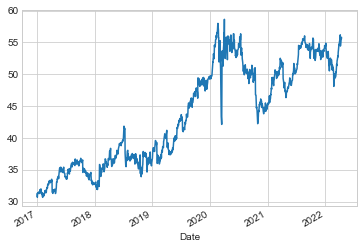

In [6]:
# Elisan päivän päätöshintojen kehitys
elisa['Close'].plot()

<AxesSubplot:xlabel='Date'>

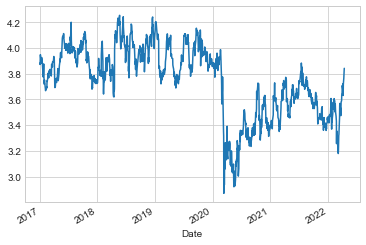

In [7]:
# Telian päivän päätöshintojen kehitys
telia['Close'].plot()

<AxesSubplot:xlabel='Date'>

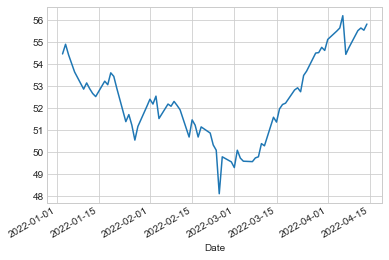

In [8]:
# Elisa vuoden 2022 alusta lähtien
elisa['Close']['2022':].plot()

<AxesSubplot:xlabel='Date'>

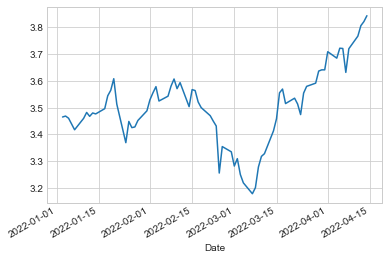

In [9]:
# Telia vuoden 2022 alusta lähtien
telia['Close']['2022':].plot()

## Aggregointi

**resample**-funktio aggregoi aikasarjan esimerkiksi päivätasolta kuukausitasolle.

resample-funktion parametrina käytettäviä arvoja:

https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#offset-aliases

<AxesSubplot:xlabel='Date'>

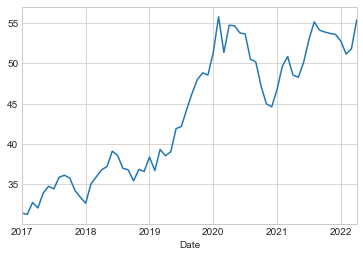

In [10]:
# Elisan päivän päätöshintojen aggregointi kuukausitasolle keskiarvoja käyttäen
elisa['Close'].resample('M').mean().plot()

<AxesSubplot:xlabel='Date'>

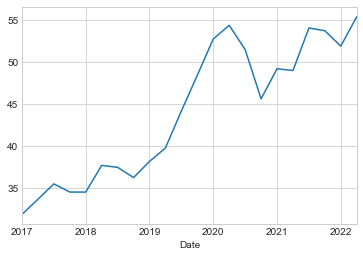

In [11]:
# Elisan päivän päätöshintojen vuosineljännestasolle keskiarvoja käyttäen
elisa['Close'].resample('Q').mean().plot()

<AxesSubplot:xlabel='Date'>

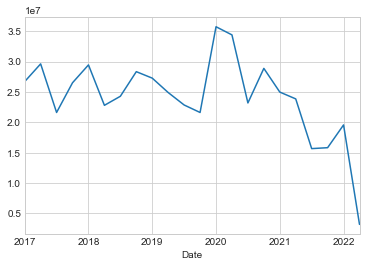

In [12]:
# Elisan osakkeen vaihdon määrä vuosineljänneksittäin (aggregointi summaa käyttäen)
# Viimeisen vuosineljänneksen kohdalla voi olla äkillinen pudotus, jos vuosineljännes on vasta aluillaan
elisa['Volume'].resample('Q').sum().plot()

## Liukuvia keskiarvoja

Liukuvilla keskiarvoilla tasoitetaan satunnaisia piikkejä. Liukuvien tunnuslukujen laskenta onnistuu **rolling**-funktiolla.

Teknisessä analyysissä aikasarjan ja liukuvien keskiarvojen leikkauskohtia käytetään osto- ja myyntisignaaleina.
Lisätietoa https://www.investopedia.com/articles/active-trading/052014/how-use-moving-average-buy-stocks.asp

<AxesSubplot:xlabel='Date'>

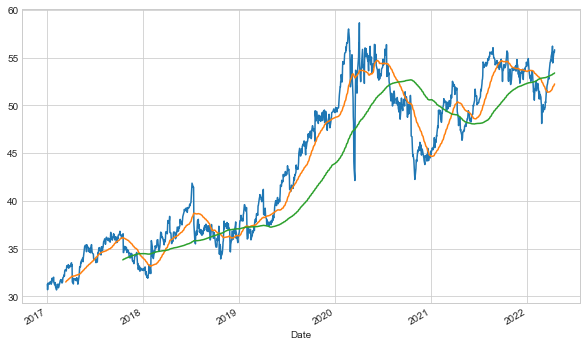

In [13]:
# Elisan päätöshinnat
elisa['Close'].plot(figsize=(10, 6))

# Elisan päätöshintojen 50 päivän liukuvat keskiarvot
elisa['Close'].rolling(50).mean().plot()

# Elisan päätöshintojen 200 päivän liukuvat keskiarvot
elisa['Close'].rolling(200).mean().plot()

## Muutosprosentit

Muutosprosentit lasketaan **pct_change**-funktiolla. Tulos on desimaalimuodossa; tarvittaessa saan prosenttiluvut kertomalla luvulla 100.

In [14]:
# Hinnan muutokset prosentteina edellisestä päivästä
elisa['Elisa%'] = elisa['Close'].pct_change()
telia['Telia%'] = telia['Close'].pct_change()

# Tarkistetaan laskennan onnistuminen
telia

,High,Low,Open,Close,Volume,Adj Close,Telia%
Date,,,,,,,
2017-01-02,3.896,3.834,3.856,3.882,1970264.0,0.094054,NaN
2017-01-03,3.904,3.858,3.900,3.872,2306182.0,0.093812,-0.002576
2017-01-04,3.918,3.874,3.890,3.908,1259518.0,0.094684,0.009298
2017-01-05,3.958,3.886,3.908,3.948,2930423.0,0.095653,0.010235
2017-01-09,3.940,3.874,3.940,3.900,2500683.0,0.094490,-0.012158
...,...,...,...,...,...,...,...
2022-04-08,3.721,3.659,3.660,3.719,1158983.0,3.719000,0.024236
2022-04-11,3.783,3.712,3.713,3.766,1756515.0,3.766000,0.012638
2022-04-12,3.813,3.729,3.733,3.805,1795007.0,3.805000,0.010356


In [15]:
# Muodostan Elisan ja Telian muutosprosenteista uuden datan
muutokset = pd.concat([elisa['Elisa%'], telia['Telia%']], axis=1)

# Jos päätöshinnoissa on puuttuvia arvoja (kauppaa ei ole käyty), niin muutosprosenteissakin on puuttuvia arvoja
# Ne kannattaa korvata muutosprosentilla 0 käyttäen fillna-toimintoa
muutokset = muutokset.fillna(0)

# Tarkistetaan lopputulos
muutokset

,Elisa%,Telia%
Date,,
2017-01-02,0.000000,0.000000
2017-01-03,-0.018234,-0.002576
2017-01-04,0.011404,0.009298
2017-01-05,0.010954,0.010235
2017-01-09,0.000000,-0.012158
...,...,...
2022-04-08,0.005511,0.024236
2022-04-11,0.014249,0.012638
2022-04-12,0.002161,0.010356


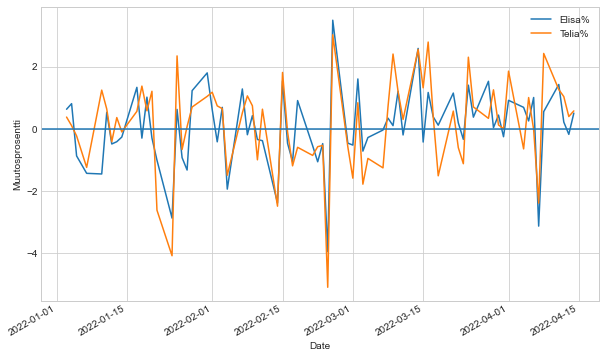

In [16]:
# Elisan ja Telian päivittäiset muutosprosentit vuoden 2022 alusta
(muutokset['2022':]*100).plot(figsize=(10, 6))

plt.ylabel('Muutosprosentti')

# Vaakaviiva nollan kohdalle; muutosprosentit vaihtelevat nollan molemmin puolin
plt.axhline()

In [17]:
# Tilastollisia tunnuslukuja muutosprosenteille
(muutokset*100).describe().round(2)

,Elisa%,Telia%
count,1328.00,1328.00
mean,0.05,0.01
std,1.38,1.34
min,-9.22,-13.45
25%,-0.55,-0.61
50%,0.08,0.03
75%,0.73,0.69
max,16.40,11.00


In [18]:
# Päivät, jolloin muutosprosentti on jommallakummalla osakkeella ollut suurempi kuin 6 %
muutokset[(abs(muutokset['Elisa%'])>0.06) | (abs(muutokset['Telia%'])>0.06)]

,Elisa%,Telia%
Date,,
2018-04-20,-0.001125,0.083107
2018-07-13,-0.092226,-0.009455
2018-10-18,-0.074751,-0.000496
2019-04-04,-0.063350,-0.007843
2019-10-17,0.068757,-0.062849
2020-03-09,-0.040785,-0.064356
2020-03-12,-0.084077,-0.134499
2020-03-17,0.164016,0.109976
2020-03-18,0.055873,-0.061963


## Muutosprosenttien välinen korrelaatio

In [19]:
# Elisan ja Telian muutosprosentit korreloivat positiivisesti
muutokset.corr()

,Elisa%,Telia%
Elisa%,1.000000,0.455497
Telia%,0.455497,1.000000


<AxesSubplot:xlabel='Elisa%', ylabel='Telia%'>

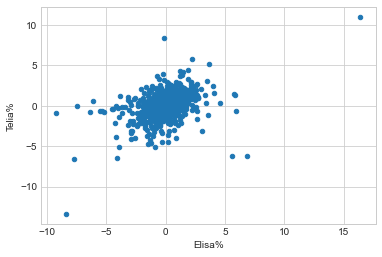

In [20]:
# Muutosprosenttien välinen positiivinen korrelaatio näkyy myös hajontakaaviossa
(muutokset*100).plot.scatter(x = 'Elisa%', y = 'Telia%')

<AxesSubplot:xlabel='Date'>

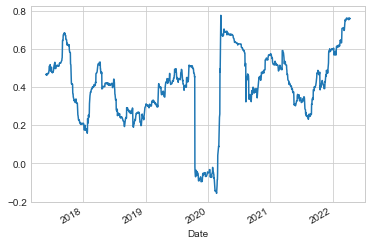

In [21]:
# Liukuva korrelaatio kertoo miten muutosprosentit korreloivat eri aikoina
muutokset['Elisa%'].rolling(100).corr(muutokset['Telia%']).plot()

## Liukuva volatiliteetti

Volatiliteetti kuvaa osakkeeseen liittyvää riskiä.

Volatiliteetti voidaan laska päivittäisten muutosprosenttien keskihajontana ( std() ) ja se skaaltaaan vuositasolle kertomalla vuoden kaupantekopäivien lukumäärän neliöjuurella (sama kuin korotus potenssiin 0.5). Vuoteen sisältyvien kaupantekopäivien lukumäärä vaihtelee vuodesta toiseen. Tässä käytetty lukumäärää 252.

Liukuva volatiliteetti kuvaa, miten volatiliteetti (riski) on muuttunut ajan kuluessa.

<AxesSubplot:xlabel='Date'>

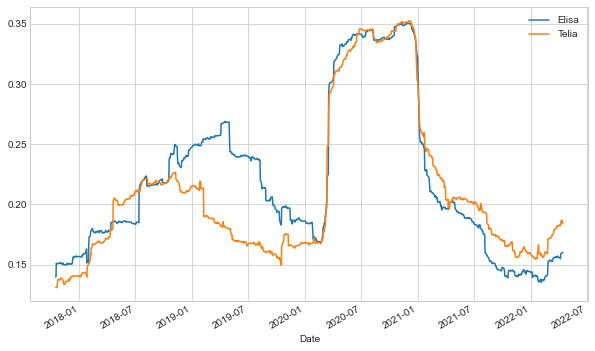

In [22]:
# 200 päivän liukuva volatiliteetti
plt.figure(figsize = (10, 6))
(muutokset['Elisa%'].rolling(200).std() * (252**0.5)).plot(label='Elisa', legend=True)
(muutokset['Telia%'].rolling(200).std() * (252**0.5)).plot(label='Telia', legend=True)

<h2>Kahden arvoakselin viivakaavio</h2>

Elisan ja Telian päätöshinnat ovat eri suuruusluokkaa. Jos haluan kuvata ne päällekkäin samaan kaavioon, niin voin käyttää kahden arvoakselin kaaviota.

Värejä https://matplotlib.org/stable/gallery/color/named_colors.html

Text(0.5, 1.0, 'Elisan ja Telian osakkeiden hinnan kehitys')

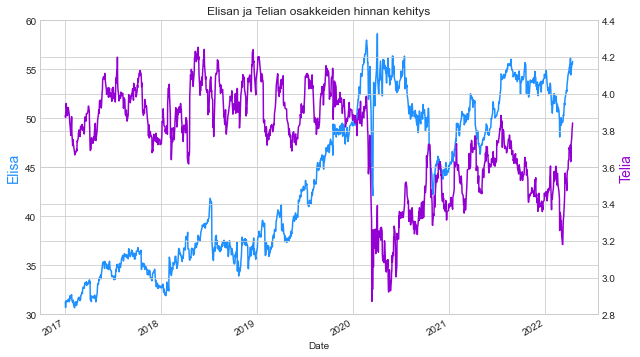

In [23]:
# Kuvion koko
plt.figure(figsize=(10, 6))

# Viivakaavio Elisan päätöshinnoista
eli = elisa['Close'].plot(color='dodgerblue')

# Elisan nimi, väri ja fonttikoko
plt.ylabel('Elisa', color='dodgerblue', fontsize=14)

# Elisan arvoakselin skaalaus (luvut valitaan läheltä pienintä ja suurinta päätöshintaa)
plt.ylim(30, 60)

# Luon Telialle kaavion (tel), jolla on yhteinen x-akseli Elisan kaavion kanssa
tel = eli.twinx()

# Viivakaavio Telian päätöshinnoista
telia['Close'].plot(ax=tel, color='darkviolet')

# Telian nimi, väri ja fonttikoko
plt.ylabel('Telia', color='darkviolet', fontsize=14)

# Telian arvoakselin skaalaus
plt.ylim(2.8, 4.4)

plt.title('Elisan ja Telian osakkeiden hinnan kehitys')

<h2>Onko viikonpäivällä yhteyttä tuottoprosenttiin?</h2>

In [24]:
# Viikonpäivät omaan sarakkeeseen (0 = maanantai)
muutokset['Weekday'] = muutokset.index.weekday

(muutokset*100).groupby('Weekday')['Elisa%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,264.0,0.183539,1.162016,-4.078550,-0.456555,0.111678,0.870660,5.780507
100,270.0,0.062877,1.527676,-3.897637,-0.640501,0.041450,0.658998,16.401613
200,270.0,0.140136,1.226126,-5.389870,-0.469827,0.050898,0.822270,5.965581
300,266.0,-0.073176,1.489022,-8.407721,-0.674793,0.034694,0.645320,6.875676
400,258.0,-0.050922,1.467556,-9.222597,-0.532017,0.103434,0.684862,3.601623


In [25]:
(muutokset*100).groupby('Weekday')['Telia%'].describe()

,count,mean,std,min,25%,50%,75%,max
Weekday,,,,,,,,
0,264.0,0.064817,1.332110,-6.435643,-0.610266,0.078229,0.756369,4.142419
100,270.0,0.148315,1.364863,-4.492134,-0.554623,0.090520,0.737248,10.997615
200,270.0,0.040097,1.181865,-6.196316,-0.580873,0.000000,0.739356,4.281607
300,266.0,-0.172328,1.495033,-13.449943,-0.713289,0.012114,0.512635,5.101370
400,258.0,-0.043007,1.321032,-6.633252,-0.638384,0.000000,0.675623,8.310701


## Lisätietoa

Data-analytiikka Pythonilla: https://tilastoapu.wordpress.com/python/